# Estimating Coordinated Daily Activity Patterns

This notebook illustrates how to re-estimate ActivitySim's CDAP model. This process 
includes running ActivitySim in estimation mode to read household travel survey files and write out
the estimation data bundles used in this notebook.  To review how to do so, please visit the other
notebooks in this directory.

# Load libraries

In [1]:
import numpy as np
import pandas as pd
import larch
import os

pd.options.display.max_columns = 150

In [2]:
os.chdir('C:\ABM3_dev\outputs')

In [3]:
persons = pd.read_csv(r'output\final_persons.csv')
households = pd.read_csv(r'output\final_households.csv')

C:\Users\davidh\AppData\Local\Temp\2\ipykernel_21892\3892607003.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  persons = pd.read_csv(r'output\final_persons.csv')


In [4]:
households.head()

,household_id,home_zone_id,income,hhsize,HHT,auto_ownership,num_workers,children,day,bldgsz,res_type,transponder_ownership,survey_year,day.1,HH_ID,chauf_id1,chauf_id2,child_id1,child_id2,child_id3,school_escorting_outbound,school_escorting_inbound,school_escorting_outbound_cond,joint_tour_frequency,joint_tour_frequency_composition,has_joint_tour,sample_rate,income_in_thousands,income_segment,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_6_to_12,num_children_5_to_15,num_children_16_to_17,num_gradeschool,num_highschool,num_college_age,num_young_adults,num_predrive_child,num_nonworker_adults,num_university_students,num_fullTime_workers,num_partTime_workers,num_retired_adults,num_highschool_graduates,num_children_6_to_15,num_young_retirees,num_old_retirees,non_family,family,home_is_urban,home_is_rural,num_hh_in_zone,av_ownership,workplace_location_accessibility,shopping_accessibility,othdiscr_accessibility,hh_work_auto_savings_ratio,num_under16_not_at_school,num_travel_active,num_travel_active_adults,num_travel_active_preschoolers,num_travel_active_children,num_travel_active_non_preschoolers,participates_in_jtf_model,auPkRetail,auPkTotal,auOpRetail,auOpTotal,trPkRetail,trPkTotal,trPkHH,...,emp_state_local_gov_blue,emp_state_local_gov_white,emp_public_ed,emp_own_occ_dwell_mgmt,emp_fed_gov_accts,emp_st_lcl_gov_accts,emp_cap_accts,emp_total,enrollgradekto8,enrollgrade9to12,collegeenroll,othercollegeenroll,adultschenrl,ech_dist,hch_dist,pseudomsa,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,TAZ,poe_id,external_work,external_nonwork,external_TAZ,external_MAZ,walk_dist_local_bus,walk_dist_premium_transit,ML_DIST,AVGTTS,PCTDETOUR,terminal_time,household_density,population_density,employment_density,density_index,is_cbd,tot_collegeenroll,preschool_target,is_parking_zone,num_hh_joint_tours
0,1,13119,44996.25,4,1,2,1,2,1,2,1,False,2016,1,161000385,2.0,1.0,3.0,4.0,NaN,1,1,1,0_tours,0.0,0.0,1,44.99625,2,3,2,2,2,0,1,2,0,2,1,0,0,2,1,0,0,1,0,2,2,0,0,False,True,False,False,14,False,10.800842,11.217657,14.884606,0.0,0,4,2,0,2,4,False,9.114823,11.525027,9.528020,11.959262,8.057191,10.158213,9.705998,...,0,0,0,0,0,0,0,4,0,0,0,0,0,432801,432801,3,4,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,4,7.8278,22.4448,22.4448,22.4448,120,0,0,46,4.2780,0.1737,12.2946,0.0000,1,1,1,7979.7289,2439,NaN,0.0,0.0,NaN,NaN,9999.000,9999.000,0.4980,1.52527,0.09832,0.0,4.856359,13.856216,0.178215,0.171907,False,0,315,True,0
1,2,19303,38685.00,2,1,2,0,0,1,2,1,False,2016,1,161000451,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0.0,0.0,1,38.68500,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,1,0,False,True,False,False,7,False,10.394149,11.339877,13.464349,0.0,0,2,2,0,0,2,False,8.845941,11.046439,9.132367,11.360222,5.187108,7.315624,7.712888,...,0,0,0,0,0,0,0,10,0,0,0,0,0,432901,432901,7,4,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,7.2567,33.7884,33.7884,33.7884,120,0,0,11,2.1970,2.5400,6.8756,1.2043,1,1,1,6025.9783,1260,NaN,0.0,0.0,NaN,NaN,0.560,1.000,7.2306,0.16124,0.20751,0.0,1.302222,4.321010,0.295960,0.241152,False,0,156,True,0
2,3,12446,17175.00,1,4,1,0,0,1,8,4,False,2016,1,161000525,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0.0,0.0,1,17.17500,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,True,False,False,False,14,False,11.403241,12.191229,14.323247,0.0,0,1,1,0,0,1,False,9.623196,11.774019,9.884143,12.113552,6.207654,8.333393,8.881074,...,0,0,0,0,0,0,0,5,0,0,0,0,0,411201,423101,5,4,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,13,11.4048,8.3940,8.3940,8.3940,120,0,0,40,5.4644,9.8891,16.0063,4.2917,1,1,2,16573.0548,4167,NaN,0.0,0.0,NaN,NaN,0.181,0.123,9.0316,0.2

In [5]:
persons.head()

,person_id,household_id,PNUM,age,sex,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,work_from_home,telecommute_frequency,day,educ,external_worker_identification,external_workplace_zone_id,transit_pass_subsidy,transit_pass_ownership,industry,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_eatout,_social,_othdiscr,non_mandatory_tour_frequency,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_preschool,is_gradeschool,is_highschool,is_university,school_segment,is_worker,is_fulltime_worker,is_parttime_worker,is_internal_worker,is_external_worker,home_zone_id,time_factor_work,time_factor_nonwork,is_income_less25K,is_income_25K_to_60K,is_income_60K_to_120K,is_income_greater60K,is_income_greater120K,is_non_worker_in_HH,is_all_adults_full_time_workers,is_pre_drive_child_in_HH,is_out_of_home_worker,external_workplace_location_logsum,external_workplace_modechoice_logsum,school_location_logsum,school_modechoice_logsum,distance_to_school,roundtrip_auto_time_to_school,workplace_location_logsum,workplace_modechoice_logsum,distance_to_work,workplace_in_cbd,work_zone_area_type,auto_time_home_to_work,roundtrip_auto_time_to_work,work_auto_savings,travel_active,under16_not_at_school,has_preschool_kid_at_home,has_school_kid_at_home,work_and_school_and_worker,work_and_school_and_student,num_mand,num_work_tours,has_pre_school_child_with_mandatory,has_driving_age_child_with_mandatory,num_joint_tours,num_non_mand,num_escort_tours,num_eatout_tours,num_shop_tours,num_maint_tours,num_discr_tours,num_social_tours,num_non_escort_tours,num_shop_maint_tours,num_shop_maint_escort_tours,num_add_shop_maint_tours,num_soc_discr_tours,num_add_soc_discr_tours
0,1,1,1,46,2,2,3,False,2,-1,5476,True,False,No_Telecommute,1,13,1,-1,0,0,healthcare,N,NaN,1,0,0,1,0,1,96,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,True,False,True,True,False,13119,0.407362,0.648903,False,True,False,False,False,True,False,True,True,NaN,NaN,NaN,NaN,NaN,0.000000,-0.984416,-0.984416,8.677074,False,3.0,22.062183,44.685173,0.0,True,False,False,False,False,False,0,0,False,False,0,3,1,1,0,0,1,0,2,0,1,0,1,0
1,2,1,2,53,1,3,3,False,4,-1,-1,False,False,NaN,1,13,1,-1,0,0,NaN,N,NaN,0,0,0,0,0,1,1,False,True,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,0,False,False,False,False,False,13119,0.279769,0.612654,False,True,False,False,False,True,False,True,False,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,False,NaN,NaN,0.000000,0.0,True,False,False,False,False,False,0,0,False,False,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,3,1,3,8,2,4,1,True,7,13464,-1,False,False,NaN,1,0,1,-1,0,0,NaN,M,school1,0,0,0,0,0,0,0,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,2,False,False,False,False,False,13119,0.412113,1.453034,False,True,False,False,False,True,False,True,False,NaN,NaN,0.853976,0.853976,3.675232,23.554642,NaN,NaN,NaN,False,NaN,NaN,0.000000,0.0,True,False,False,False,False,False,1,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,4,15,2,4,1,True,7,13466,-1,False,False,NaN,1,0,1,-1,0,0,NaN,M,school1,0,0,0,0,0,1,1,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False,3,False,False,False,False,False,13119,0.759176,0.316427,False,True,False,False,False,True,False,True,False,NaN,NaN,0.339338,0.339338,4.859625,29.436872,NaN,NaN,NaN,False,NaN,NaN,0.000000,0.0,True,False,False,False,False,False,1,0,False,False,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,5,2,1,60,2,3,3,False,4,-1,-1,False,False,NaN,1,13,1,-1,0,0,NaN,N,NaN,0,0,0,0,0,1,1,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,19303,1.437325,1.281885,False,True,Fa

In [6]:
cdap_dir = r'output\estimation_data_bundle\cdap'
full_edb = pd.read_csv(os.path.join(cdap_dir, 'cdap_values_combined_full.csv'))

C:\Users\davidh\AppData\Local\Temp\2\ipykernel_21892\2743892615.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  full_edb = pd.read_csv(os.path.join(cdap_dir, 'cdap_values_combined_full.csv'))


In [7]:
hhs_with_missing_model_choice = full_edb[full_edb.model_choice.isna()].household_id.unique()
print(len(hhs_with_missing_model_choice))
households['person_count'] = persons.groupby(['household_id']).person_id.count().values
assert (persons.groupby(['household_id']).person_id.count().index == households.household_id).all()
hhs_with_hhsize_not_correct = households[households.person_count != households.hhsize].household_id.unique()
print(len(hhs_with_hhsize_not_correct))
# difference is households with hhsize > 5

435
438


In [8]:
print("Number of total people requiring cdap:", len(full_edb))
# df = full_edb[full_edb.hhsize <= 10]
df = full_edb[~full_edb.model_choice.isna()].copy()
print("Number of people with hhsize <= 2:", len(df))

Number of total people requiring cdap: 96881
Number of people with hhsize <= 2: 96106


In [9]:
# Creating expressions that need to use numpy since larch estimation code doesn't parse it well
df['tmp_base_work_mc_logsum'] = np.where((df.workplace_zone_id > 0) & (df.is_external_worker == False), df.workplace_location_logsum, 0)
df['tmp_ptype1_work_mc_logsum'] = np.where((df.ptype == 1)  & (df.workplace_zone_id > 0) & (df.is_external_worker == False), df.workplace_location_logsum, 0)
df['tmp_ptype2_work_mc_logsum'] = np.where((df.ptype == 2)  & (df.workplace_zone_id > 0) & (df.is_external_worker == False), df.workplace_location_logsum, 0)
df['tmp_ptype3_school_mc_logsum'] = np.where((df.ptype == 3)  & (df.school_zone_id > 0), df.school_modechoice_logsum, 0)
df['tmp_ptype6_school_mc_logsum'] = np.where((df.ptype == 6)  & (df.school_zone_id > 0), df.school_modechoice_logsum, 0)
df['tmp_ptype7_school_mc_logsum'] = np.where((df.ptype == 7)  & (df.school_zone_id > 0), df.school_modechoice_logsum, 0)

In [10]:
df.to_csv(os.path.join(cdap_dir, 'cdap_values_combined.csv'), index=False)

In [11]:
spec = pd.read_csv(os.path.join(cdap_dir, 'cdap_INDIV_AND_HHSIZE1_SPEC.csv'))
coeffs = spec[['M', 'N', 'H']].melt(value_name='coefficient_name')
coeffs = coeffs[~coeffs.coefficient_name.isna()].drop(columns='variable').drop_duplicates(subset='coefficient_name', keep='first')
coeffs['value'] = 0.0
coeffs['constrain'] = 'F'
coeffs.set_index('coefficient_name', inplace=True)
coeffs.loc['coef_UNAVAILABLE'] = (-999.0, 'T')
coeffs.to_csv(os.path.join(cdap_dir, 'coef_helper.csv'))

# Load data and prep model for estimation

In [12]:
modelname = "cdap"

# import importlib
# importlib.reload(activitysim.estimation.larch)
from activitysim.estimation.larch import component_model
model, data = component_model(modelname, return_data=True)

c:\abm3_dev\activitysim\activitysim\estimation\larch\cdap.py:375: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(edb_directory, filename), **kwargs)


Including joint tour utiltiy?: False


c:\abm3_dev\activitysim\activitysim\estimation\larch\cdap.py:375: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(edb_directory, filename), **kwargs)
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>
one-hot encoding choice array
converting data_ch to <class 'numpy.float64'>


# Review Inputs

## Settings

In [13]:
data.settings

┣          INDIV_AND_HHSIZE1_SPEC: 'cdap_indiv_and_hhsize1.csv'
┣                    COEFFICIENTS: 'cdap_coefficients.csv'
┣        INTERACTION_COEFFICIENTS: 'cdap_interaction_coefficients.csv'
┣ FIXED_RELATIVE_PROPORTIONS_SPEC: 'cdap_fixed_relative_proportions.csv'
┣          ADD_JOINT_TOUR_UTILITY: True
┣         JOINT_TOUR_COEFFICIENTS: 'cdap_joint_tour_coefficients.csv'
┣       JOINT_TOUR_USEFUL_COLUMNS: ---
┃                                  - auto_ownership
┃                                  - income
┃                                  - num_workers
┃                                  - shopping_accessibility
┃                                  - workplace_modechoice_logsum
┃                                  ...
┣                       CONSTANTS: ┣       FULL: 1
┃                                  ┣       PART: 2
┃                                  ┣ UNIVERSITY: 3
┃                                  ┣    NONWORK: 4
┃                                  ┣    RETIRED: 5
┃                   

## Households

In [14]:
data.households

,household_id,home_zone_id,income,hhsize,HHT,auto_ownership,num_workers,children,day,bldgsz,res_type,transponder_ownership,survey_year,day.1,HH_ID,chauf_id1,chauf_id2,child_id1,child_id2,child_id3,school_escorting_outbound,school_escorting_inbound,school_escorting_outbound_cond,joint_tour_frequency,joint_tour_frequency_composition,has_joint_tour,sample_rate,income_in_thousands,income_segment,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_6_to_12,num_children_5_to_15,num_children_16_to_17,num_gradeschool,num_highschool,num_college_age,num_young_adults,num_predrive_child,num_nonworker_adults,num_university_students,num_fullTime_workers,num_partTime_workers,num_retired_adults,num_highschool_graduates,num_children_6_to_15,num_young_retirees,num_old_retirees,non_family,family,home_is_urban,home_is_rural,num_hh_in_zone,av_ownership,workplace_location_accessibility,shopping_accessibility,othdiscr_accessibility,hh_work_auto_savings_ratio,num_under16_not_at_school,num_travel_active,num_travel_active_adults,num_travel_active_preschoolers,num_travel_active_children,num_travel_active_non_preschoolers,participates_in_jtf_model,auPkRetail,auPkTotal,auOpRetail,auOpTotal,trPkRetail,trPkTotal,trPkHH,...,emp_state_local_gov_blue,emp_state_local_gov_white,emp_public_ed,emp_own_occ_dwell_mgmt,emp_fed_gov_accts,emp_st_lcl_gov_accts,emp_cap_accts,emp_total,enrollgradekto8,enrollgrade9to12,collegeenroll,othercollegeenroll,adultschenrl,ech_dist,hch_dist,pseudomsa,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,TAZ,poe_id,external_work,external_nonwork,external_TAZ,external_MAZ,walk_dist_local_bus,walk_dist_premium_transit,ML_DIST,AVGTTS,PCTDETOUR,terminal_time,household_density,population_density,employment_density,density_index,is_cbd,tot_collegeenroll,preschool_target,is_parking_zone,num_hh_joint_tours
0,1,13119,44996.25,4,1,2,1,2,1,2,1,False,2016,1,161000385,2.0,1.0,3.0,4.0,NaN,1,1,1,0_tours,0.0,0.0,1,44.99625,2,3,2,2,2,0,1,2,0,2,1,0,0,2,1,0,0,1,0,2,2,0,0,False,True,False,False,14,False,10.800842,11.217657,14.884606,0.0,0,4,2,0,2,4,False,9.114823,11.525027,9.528020,11.959262,8.057191,10.158213,9.705998,...,0,0,0,0,0,0,0,4,0,0,0,0,0,432801,432801,3,4,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,4,7.8278,22.4448,22.4448,22.4448,120,0,0,46,4.2780,0.1737,12.2946,0.0000,1,1,1,7979.7289,2439,NaN,0.0,0.0,NaN,NaN,9999.000,9999.000,0.4980,1.52527,0.09832,0.0,4.856359,13.856216,0.178215,0.171907,False,0,315,True,0
1,2,19303,38685.00,2,1,2,0,0,1,2,1,False,2016,1,161000451,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0.0,0.0,1,38.68500,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,1,0,False,True,False,False,7,False,10.394149,11.339877,13.464349,0.0,0,2,2,0,0,2,False,8.845941,11.046439,9.132367,11.360222,5.187108,7.315624,7.712888,...,0,0,0,0,0,0,0,10,0,0,0,0,0,432901,432901,7,4,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,1,7.2567,33.7884,33.7884,33.7884,120,0,0,11,2.1970,2.5400,6.8756,1.2043,1,1,1,6025.9783,1260,NaN,0.0,0.0,NaN,NaN,0.560,1.000,7.2306,0.16124,0.20751,0.0,1.302222,4.321010,0.295960,0.241152,False,0,156,True,0
2,3,12446,17175.00,1,4,1,0,0,1,8,4,False,2016,1,161000525,NaN,NaN,NaN,NaN,NaN,1,1,1,0_tours,0.0,0.0,1,17.17500,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,True,False,False,False,14,False,11.403241,12.191229,14.323247,0.0,0,1,1,0,0,1,False,9.623196,11.774019,9.884143,12.113552,6.207654,8.333393,8.881074,...,0,0,0,0,0,0,0,5,0,0,0,0,0,411201,423101,5,4,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,13,11.4048,8.3940,8.3940,8.3940,120,0,0,40,5.4644,9.8891,16.0063,4.2917,1,1,2,16573.0548,4167,NaN,0.0,0.0,NaN,NaN,0.18

## Person Data

In [15]:
data.person_data

,person_id,model_choice,override_choice,household_id,PNUM,age,sex,pemploy,pstudent,is_student,ptype,school_zone_id,workplace_zone_id,free_parking_at_work,work_from_home,telecommute_frequency,day,educ,external_worker_identification,external_workplace_zone_id,transit_pass_subsidy,transit_pass_ownership,industry,cdap_activity,mandatory_tour_frequency,_escort,_shopping,_othmaint,_eatout,_social,_othdiscr,non_mandatory_tour_frequency,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_preschool,is_gradeschool,is_highschool,is_university,school_segment,is_worker,is_fulltime_worker,is_parttime_worker,is_internal_worker,is_external_worker,home_zone_id,time_factor_work,time_factor_nonwork,is_income_less25K,is_income_25K_to_60K,is_income_60K_to_120K,is_income_greater60K,is_income_greater120K,is_non_worker_in_HH,is_all_adults_full_time_workers,is_pre_drive_child_in_HH,is_out_of_home_worker,external_workplace_location_logsum,external_workplace_modechoice_logsum,school_location_logsum,school_modechoice_logsum,distance_to_school,roundtrip_auto_time_to_school,...,emp_total,enrollgradekto8,enrollgrade9to12,collegeenroll,othercollegeenroll,adultschenrl,ech_dist,hch_dist,pseudomsa,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,TAZ,poe_id,external_work,external_nonwork,external_TAZ,external_MAZ,walk_dist_local_bus,walk_dist_premium_transit,ML_DIST,AVGTTS,PCTDETOUR,terminal_time,household_density,population_density,employment_density,density_index,is_cbd,tot_collegeenroll,preschool_target,is_parking_zone,chunk_id,tmp_base_work_mc_logsum,tmp_ptype1_work_mc_logsum,tmp_ptype2_work_mc_logsum,tmp_ptype3_school_mc_logsum,tmp_ptype6_school_mc_logsum,tmp_ptype7_school_mc_logsum,cdap_rank
0,1,M,N,1,1,46,2,2,3,False,2,-1,5476,True,False,No_Telecommute,1,13,1,-1,0,0,healthcare,N,NaN,1,0,0,1,0,1,96,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,True,False,True,True,False,13119,0.407362,0.648903,False,True,False,False,False,True,False,True,True,NaN,NaN,NaN,NaN,NaN,0.000000,...,4,0,0,0,0,0,432801,432801,3,4,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,4,7.8278,22.4448,22.4448,22.4448,120,0,0,46,4.2780,0.1737,12.2946,0.0000,1,1,1,7979.7289,2439,NaN,0.0,0.0,NaN,NaN,9999.000,9999.000,0.4980,1.52527,0.09832,0.0,4.856359,13.856216,0.178215,0.171907,False,0,315,True,0,-0.984416,0.000000,-0.984416,0.0,0.0,0.000000,1
1,2,N,N,1,2,53,1,3,3,False,4,-1,-1,False,False,NaN,1,13,1,-1,0,0,NaN,N,NaN,0,0,0,0,0,1,1,False,True,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,0,False,False,False,False,False,13119,0.279769,0.612654,False,True,False,False,False,True,False,True,False,NaN,NaN,NaN,NaN,NaN,0.000000,...,4,0,0,0,0,0,432801,432801,3,4,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0,0,0,0,0,0,0,1,4,7.8278,22.4448,22.4448,22.4448,120,0,0,46,4.2780,0.1737,12.2946,0.0000,1,1,1,7979.7289,2439,NaN,0.0,0.0,NaN,NaN,9999.000,9999.000,0.4980,1.52527,0.09832,0.0,4.856359,13.856216,0.178215,0.171907,False,0,315,True,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4
2,3,M,M,1,3,8,2,4,1,True,7,13464,-1,False,False,NaN,1,0,1,-1,0,0,NaN,M,school1,0,0,0,0,0,0,0,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,2,False,False,False,False,False,13119,0.412113,1.453034,False,True,False,False,False,True,False,True,False,NaN,NaN,0.853976,0.853976,3.675232,23.554642,...,4,0,0,0,0,0,432801,432801,3,4

In [16]:
data.person_data.workplace_modechoice_logsum.value_counts()

-0.984416    1
-4.254023    1
-1.921715    1
-3.454447    1
 0.041448    1
            ..
 0.158458    1
-2.722060    1
-1.784757    1
-2.473431    1
-1.709973    1
Name: workplace_modechoice_logsum, Length: 37514, dtype: int64

In [17]:
data.person_data.tmp_ptype1_work_mc_logsum.value_counts()

 0.000000    74500
-2.994558        1
-3.873420        1
-3.424878        1
-3.040386        1
             ...  
-2.817306        1
-2.086979        1
-2.369660        1
-7.090546        1
-1.709973        1
Name: tmp_ptype1_work_mc_logsum, Length: 21607, dtype: int64

In [18]:
data.person_data.tmp_ptype1_work_mc_logsum.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
96101    False
96102    False
96103    False
96104    False
96105    False
Name: tmp_ptype1_work_mc_logsum, Length: 96106, dtype: bool

<AxesSubplot: >

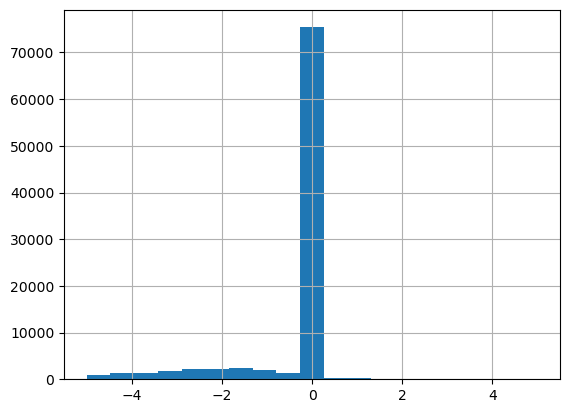

In [19]:
data.person_data.tmp_ptype1_work_mc_logsum.hist(bins=np.linspace(-5,5,20))

<AxesSubplot: >

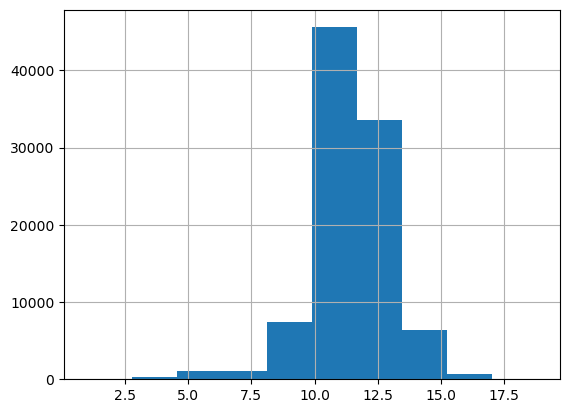

In [20]:
data.person_data.shopping_accessibility.hist()

<AxesSubplot: >

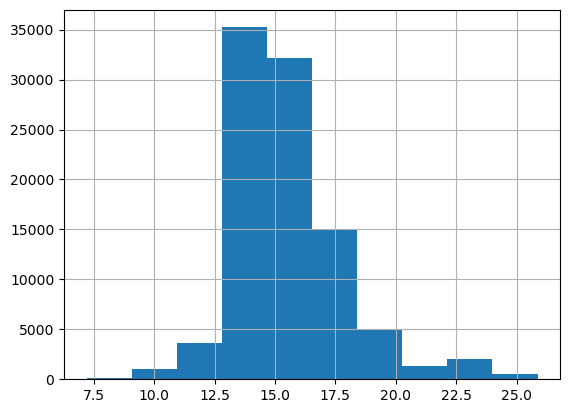

In [21]:
data.person_data.othdiscr_accessibility.hist()

In [22]:
(data.person_data.override_choice == data.person_data.cdap_activity).all()

True

In [23]:
df = data.person_data.copy()
df['mand_status'] = np.select(condlist=[df.is_worker, df.is_student, (df.is_worker & df.is_student), ~(df.is_worker | df.is_student)], choicelist=['worker', 'student', 'both', 'neither'])
pd.crosstab(df.mand_status, df.override_choice, margins=True)

override_choice,H,M,N,All
mand_status,,,,
neither,22387,0,6530,28917
student,13286,2320,2274,17880
worker,32955,9369,6985,49309
All,68628,11689,15789,96106


In [24]:
pd.crosstab(df.telecommute_frequency, df.override_choice, margins=True)

override_choice,H,M,N,All
telecommute_frequency,,,,
1_day_week,3081,1455,545,5081
2_3_days_week,1373,309,370,2052
4_days_week,397,196,315,908
No_Telecommute,19662,7346,2937,29945
All,24513,9306,4167,37986


## interaction_coef

In [25]:
data.interaction_coef

,activity,interaction_ptypes,coefficient,cardinality,slug
0,H,11,0,2,HH11
1,H,12,0,2,HH12
2,H,13,0,2,HH13
3,H,14,0,2,HH14
4,H,15,0,2,HH15
...,...,...,...,...,...
94,H,,0,3,HHH
95,N,,0,4,NNNN
96,H,,0,4,HHHH
97,N,,0,5,NNNNN


## Spec 1

In [26]:
data.spec1

,Description,Expression,M,N,H
0,Full-time worker ASC,ptype == 1,coef_full_time_worker_asc_M,coef_full_time_worker_asc_N,NaN
1,Full-time worker ASC,ptype == 1,NaN,coef_full_time_worker_asc_N,NaN
2,Part-time worker ASC,ptype == 2,coef_part_time_worker_asc_M,coef_part_time_worker_asc_N,NaN
3,University student ASC,ptype == 3,coef_university_student_asc_M,coef_university_student_asc_N,NaN
4,Non-working adult ASC,ptype == 4,NaN,coef_non_working_adult_asc_N,NaN
5,Retired ASC,ptype == 5,NaN,coef_retired_asc_N,NaN
6,Driving-age child who is in school ASC,ptype == 6,coef_driving_age_child_asc_M,coef_driving_age_child_asc_N,NaN
7,Pre-driving-age child who is in school ASC,ptype == 7,coef_pre_driving_age_child_asc_M,coef_pre_driving_age_child_asc_N,NaN
8,Preschool child ASC,ptype == 8,coef_preschool_child_asc_M,coef_preschool_child_asc_N,NaN
9,Full-time worker interaction with age less tha...,(ptype == 1) & (age < 35),NaN,coef_full_time_worker_age_less_than_35_N,NaN


# Review Model

## Utility Functions for HHSize 1

In [27]:
model[0].utility_functions() ## HH Size = 1 

<xmle.Elem 'div' with 1 children>

## Utility Functions for HHSize 2

In [28]:
# model[1].utility_functions() ## HH Size = 2

# Re-Estimate Model

With the model setup for estimation, the next step is to estimate the model coefficients.  Make sure to use a sufficiently large enough household sample and set of zones to avoid an over-specified model, which does not have a numerically stable likelihood maximizing solution.  Larch has two built-in estimation methods: BHHH and SLSQP.  BHHH is the default and typically runs faster, but does not follow constraints on parameters.  SLSQP is safer, but slower, and may need additional iterations.

In [29]:
# r = model.estimate(method='BHHH', options={'maxiter':1000})
model.estimate(method='SLSQP', options={'maxiter':1500})

,value,initvalue,nullvalue,minimum,maximum,holdfast,note,best
coef_UNAVAILABLE,-999.000000,-999.0,0.0,-999.0,-999.0,1,,-999.000000
coef_base_non_mand_accessibiliy_N,-0.002518,0.0,0.0,NaN,NaN,0,,-0.002518
coef_base_worker_work_mc_logsum_M,0.030280,0.0,0.0,NaN,NaN,0,,0.030280
coef_driving_age_child_2016_asc_M,-0.267541,0.0,0.0,NaN,NaN,0,,-0.267541
coef_driving_age_child_2016_asc_N,-1.411869,0.0,0.0,NaN,NaN,0,,-1.411869
...,...,...,...,...,...,...,...,...
coef_N_127_128,0.321994,0.0,0.0,NaN,NaN,0,,0.321994
coef_N_177_178_187_188,-0.589256,0.0,0.0,NaN,NaN,0,,-0.589256
coef_N_277_278_287_288,0.304549,0.0,0.0,NaN,NaN,0,,0.304549
coef_N_777_778_788_888,-0.555566,0.0,0.0,NaN,NaN,0,,-0.555566


┣                x: coef_UNAVAILABLE                    -999.000000
┃                   coef_base_non_mand_accessibiliy_N     -0.002518
┃                   coef_base_worker_work_mc_logsum_M      0.030280
┃                   coef_driving_age_child_2016_asc_M     -0.267541
┃                   coef_driving_age_child_2016_asc_N     -1.411869
┃                                                           ...    
┃                   coef_N_127_128                         0.321994
┃                   coef_N_177_178_187_188                -0.589256
┃                   coef_N_277_278_287_288                 0.304549
┃                   coef_N_777_778_788_888                -0.555566
┃                   coef_N_xxxxx                           0.458390
┃                   Length: 129, dtype: float64
┣          loglike: -46326.16122976095
┣        d_loglike: coef_UNAVAILABLE                     0.000000
┃                   coef_base_non_mand_accessibiliy_N   -0.009848
┃                   coef_base_worker_work_mc_logsum_M   -0.009788
┃                   coef_driving_age_child_2016_asc_M    0.000369
┃                   coef_driving_age_child_2016_asc_N   -0.000048
┃                                                          ...   
┃                   coef_N_127_128                       0.000015
┃                   coef_N_177_178_187_188              -0.001445
┃                   coef_N_277_278_287_288               0.000061
┃                   coef_N_777_778_788_888              -0.000669
┃                   coef_N_xxxxx                        -0.000007
┃                   Length: 129, dtype: float64
┣              nit: 175
┣             nfev: 511
┣             njev: 175
┣           status: 0
┣          message: 'Optimization terminated successfully'
┣          success: True
┣     elapsed_time: datetime.timedelta(seconds=997, microseconds=654917)
┣           method: 'SLSQP'
┣          n_cases: 49327
┣ iteration_number: 175
┣          logloss: 0.939164377111135

In [30]:
model.parameter_summary()

,Value,Std Err,t Stat,Signif,Null Value
coef_UNAVAILABLE,-999.,0.00,NA,,0.00
coef_base_non_mand_accessibiliy_N,-0.00252,0.00956,-0.26,,0.00
coef_base_worker_work_mc_logsum_M,0.0303,0.0290,1.04,,0.00
coef_driving_age_child_2016_asc_M,-0.268,0.332,-0.81,,0.00
coef_driving_age_child_2016_asc_N,-1.41,0.300,-4.71,***,0.00
coef_driving_age_child_asc_M,-0.865,0.337,-2.56,*,0.00
coef_driving_age_child_asc_N,-0.166,0.306,-0.54,,0.00
coef_ft_worker_work_from_home_N,0.546,0.0486,11.25,***,0.00
coef_full_time_worker_2016_asc_N,-0.744,0.0225,-33.09,***,0.00
coef_full_time_worker_age_less_than_35_N,0.157,0.0377,4.16,***,0.00


# Output Estimation Results

In [31]:
from larch.util.activitysim import update_coefficients
coefficients = update_coefficients(model, data)

In [32]:
result_dir = data.edb_directory/'estimated'

In [33]:
os.makedirs(result_dir, exist_ok=True)

### Write the re-estimated coefficients file

In [34]:
coefficients.reset_index().to_csv(
    result_dir/"cdap_coefficients_revised.csv", 
    index=False,
)

### Write the model estimation report, including coefficient t-statistic and log likelihood

In [35]:
for hh_size, submodel in enumerate(model, 1):
    if hh_size > 2: 
        break 
        # the largest HH sizes have massive model reports that 
        # Excel doesn't handle well; review them in Jupyter 
        # instead if you are interested
    submodel.to_xlsx(
        result_dir/f"cdap_model_estimation_hhsize{hh_size}.xlsx", 
        data_statistics=True,
    )

c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\util\excel.py:523: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  xl = ExcelWriter(filename, engine='xlsxwriter_larch', model=model, **kwargs)
c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\util\excel.py:478: FutureWarning: path is not part of the public API, usage can give unexpected results and will be removed in a future version
  if self.path is not None:
c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\util\excel.py:496: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  super().save()
c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\util\excel.py:523: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  xl = ExcelWriter(filename, engine='xlsxwriter_larch', model=model, **kwargs)
c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\util\excel.py:4

In [37]:
model[3].to_xlsx(
    result_dir/f"cdap_model_estimation_hhsize{hh_size}.xlsx", 
    data_statistics=True,
)

c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\util\excel.py:523: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  xl = ExcelWriter(filename, engine='xlsxwriter_larch', model=model, **kwargs)
c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\util\excel.py:478: FutureWarning: path is not part of the public API, usage can give unexpected results and will be removed in a future version
  if self.path is not None:
c:\Users\davidh\.conda\envs\baydag_v2\lib\site-packages\larch\util\excel.py:496: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  super().save()


# Next Steps

The final step is to either manually or automatically copy the `cdap_coefficients.csv_revised.csv` file to the configs folder, rename it to `cdap_coefficients.csv.csv`, and run ActivitySim in simulation mode.

In [36]:
pd.read_csv(result_dir/"cdap_coefficients_revised.csv")

,coefficient_name,value,constrain
0,coef_full_time_worker_asc_M,-5.392739,F
1,coef_part_time_worker_asc_M,1.490801,F
2,coef_university_student_asc_M,-0.845871,F
3,coef_driving_age_child_asc_M,-0.864541,F
4,coef_pre_driving_age_child_asc_M,-0.648128,F
...,...,...,...
197,coef_N_xxxx,0.000000,F
198,coef_H_xxxx,0.000000,F
199,coef_M_xxxxx,0.000000,F
200,coef_N_xxxxx,0.458390,F
